In [1]:
import project_etl
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 30})




In [2]:
df = project_etl.load(True, filename='http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt')

Forcing through a new extract and transformation!
transformed into .Turnstile_transformed.pickle
Loaded forced new copy of data from .Turnstile_transformed.pickle!


In [3]:
df.dtypes

DATE_TIME              datetime64[ns]
C/A                            object
UNIT                           object
SCP                            object
STATION                        object
LINENAME                       object
DIVISION                       object
DATE                           object
TIME                           object
DESC                           object
DAY                            object
TURNSTILE_ENTRIES             float64
TURNSTILE_EXITS               float64
TIME_DELTA            timedelta64[ns]
entries_cumsum                float64
exits_cumsum                  float64
sum_people                    float64
TIME_IN_HOURS                 float64
TURNSTILE_SUM_RATE            float64
dtype: object

In [4]:
project_etl.top_20(df)

312    GRD CNTRL-42 ST
90     34 ST-HERALD SQ
94      34 ST-PENN STA
103    42 ST-PORT AUTH
28      14 ST-UNION SQ
448     TIMES SQ-42 ST
302          FULTON ST
289      FLUSHING-MAIN
107     47-50 STS ROCK
126     59 ST COLUMBUS
339    JKSN HT-ROOSVLT
404       PATH NEW WTC
93      34 ST-PENN STA
235           CANAL ST
460     W 4 ST-WASH SQ
101    42 ST-BRYANT PK
165              96 ST
122              59 ST
355    LEXINGTON AV/53
157              86 ST
Name: STATION, dtype: object


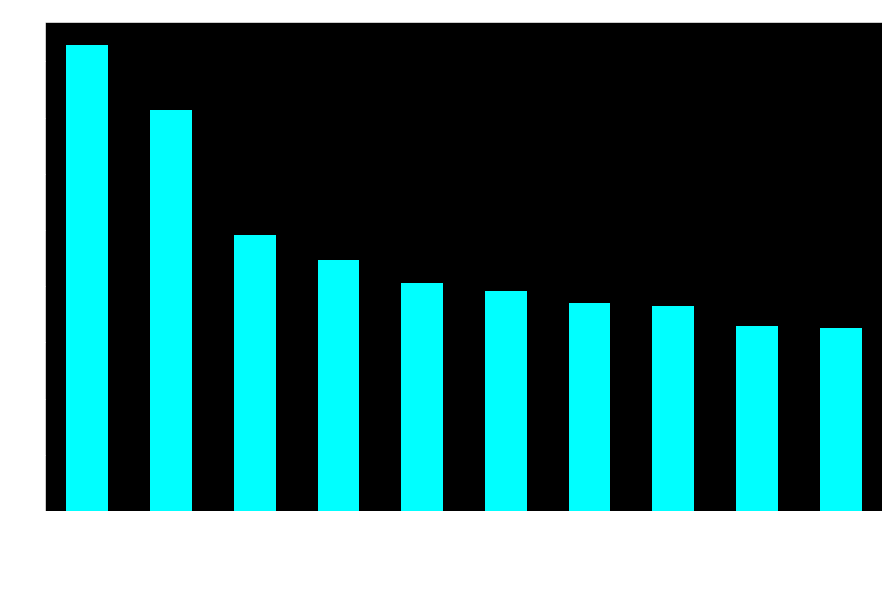

In [5]:
## Use this to make a bar graph of the most used stations total counts ##
daily_riders = df.groupby(by=["STATION", "LINENAME"])["TURNSTILE_ENTRIES", "TURNSTILE_EXITS"].sum().reset_index()
daily_riders['Tot_people']=daily_riders["TURNSTILE_ENTRIES"]+daily_riders["TURNSTILE_EXITS"]
top_stations = daily_riders.sort_values(by=['Tot_people'], ascending=False)
top_20_stations = top_stations[:10]

chart = top_20_stations['Tot_people'].plot(kind='bar',figsize=(15,9),cmap='cool');
# other good colors, spring
chart.set_xticklabels(top_20_stations['STATION'], rotation=45, horizontalalignment='right', color='w');
chart.set_ylabel('Total Weekly Riders')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText = True,  )

fig = chart.get_figure()
fig.savefig('tester1.png', transparent=True,bbox_inches='tight')


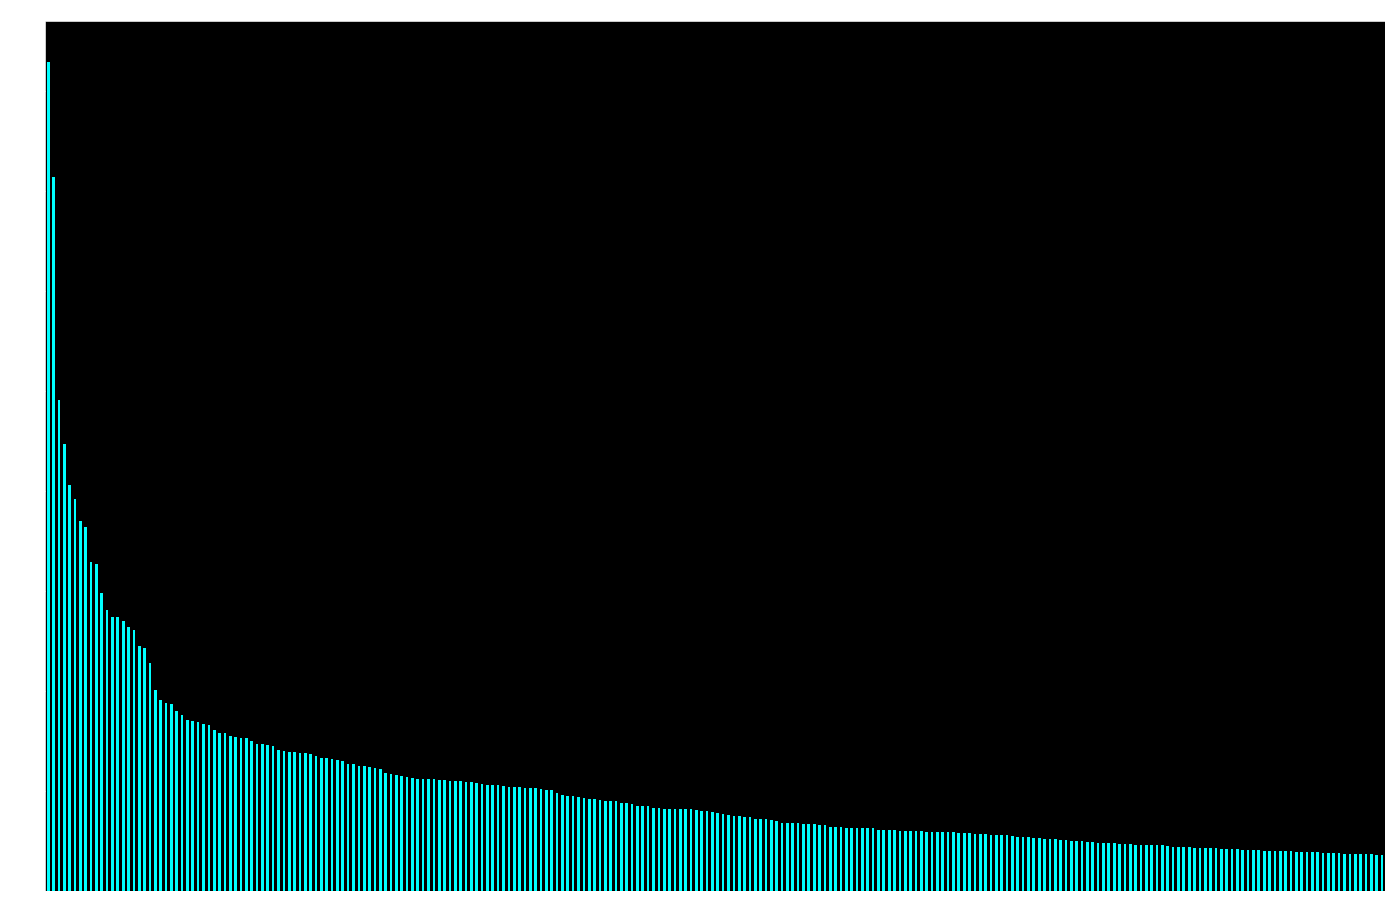

In [6]:
## Use this to make a bar graph of the most used stations total counts ##
daily_riders = df.groupby(by=["STATION", "LINENAME"])["TURNSTILE_ENTRIES", "TURNSTILE_EXITS"].sum().reset_index()
daily_riders['Tot_people']=daily_riders["TURNSTILE_ENTRIES"]+daily_riders["TURNSTILE_EXITS"]
top_stations = daily_riders.sort_values(by=['Tot_people'], ascending=False)
top_20_stations = top_stations[:250]

chart = top_20_stations['Tot_people'].plot(kind='bar',figsize=(24,16),cmap='cool');
# other good colors, spring
#chart.set_xticklabels(top_20_stations['STATION'], rotation=45, horizontalalignment='right', color='k');
chart.axes.get_xaxis().set_visible(False)
chart.set_ylabel('Total Weekly Riders')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText = True,  )

fig = chart.get_figure()
fig.savefig('200stations.png', transparent=True,bbox_inches='tight')

In [7]:
#df2=ETL.load(True,'filename')
df.head(5)
#top_20_stations.head(5)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,DAY,TURNSTILE_ENTRIES,TURNSTILE_EXITS,TIME_DELTA,entries_cumsum,exits_cumsum,sum_people,TIME_IN_HOURS,TURNSTILE_SUM_RATE
1,2019-06-22 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,Saturday,13.0,8.0,04:00:00,13.0,8.0,21.0,4.0,5.25
2,2019-06-22 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,Saturday,23.0,26.0,04:00:00,36.0,34.0,49.0,4.0,12.25
3,2019-06-22 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,Saturday,97.0,50.0,04:00:00,133.0,84.0,147.0,4.0,36.75
4,2019-06-22 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,Saturday,217.0,40.0,04:00:00,350.0,124.0,257.0,4.0,64.25
5,2019-06-22 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,20:00:00,REGULAR,Saturday,258.0,27.0,04:00:00,608.0,151.0,285.0,4.0,71.25


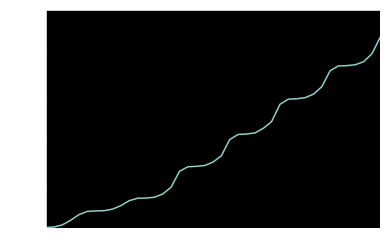

In [8]:
mask = ((df["C/A"] == "A002") & 
        (df["UNIT"] == "R051") & 
        (df["SCP"] == "02-00-00") & 
        (df["STATION"] == "59 ST"))
#df[mask].head(20)
#for i in len(df.STATIONS)
#fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
plt.ylim([0,10000])
#df.groupby(by=["STATION", "C/A", "SCP", "LINENAME"])["TURNSTILE_ENTRIES"].cumsum().plot()
#df.groupby(by=["STATION", "C/A", "SCP", "LINENAME"])["Entries_cumsum"].plot()
df2=df[mask]
#df2["Entries_cumsum"]

#df2["TURNSTILE_ENTRIES"].plot()
df2["entries_cumsum"].plot()

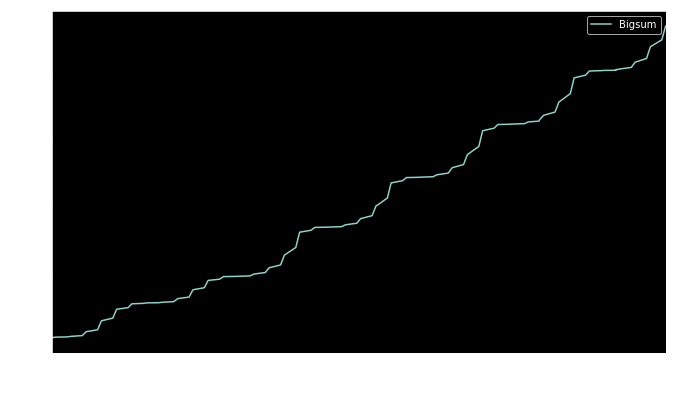

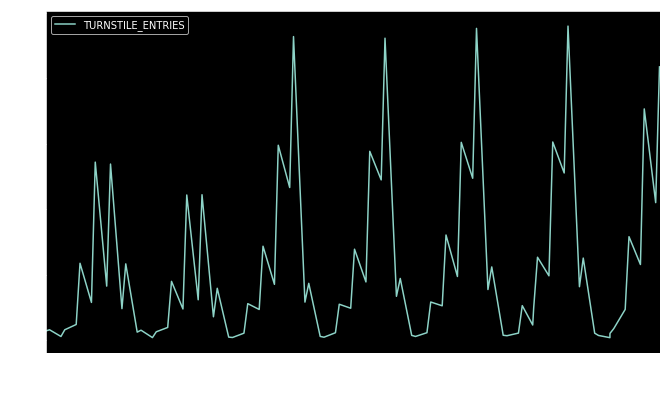

In [9]:
mask1 = (df["STATION"] == "CANAL ST")
#df[mask].head(20)
#for i in len(df.STATIONS)
#fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
#plt.ylim([0,10000])
#df.groupby(by=["STATION", "C/A", "SCP", "LINENAME"])["TURNSTILE_ENTRIES"].cumsum().plot()
#df.groupby(by=["STATION", "C/A", "SCP", "LINENAME"])["Entries_cumsum"].plot()
df3=df[mask1]
df4=df3.groupby(df3['DATE_TIME']).sum().reset_index()
df4['Bigsum']=df4['TURNSTILE_ENTRIES'].cumsum()
df4.head(20)

#df2["Entries_cumsum"]
#df3.head()
#df2["TURNSTILE_ENTRIES"].plot()
df4.plot(x ='DATE_TIME', y='Bigsum',figsize=(11,7))
df4.plot(x ='DATE_TIME', y='TURNSTILE_ENTRIES',figsize=(11,7))
#df3.tail(20)
#df3.shape
#chart = top_20_stations[x ='DATE_TIME', y='TURNSTILE_ENTRIES'].plot(kind='scatter',figsize=(9,5));

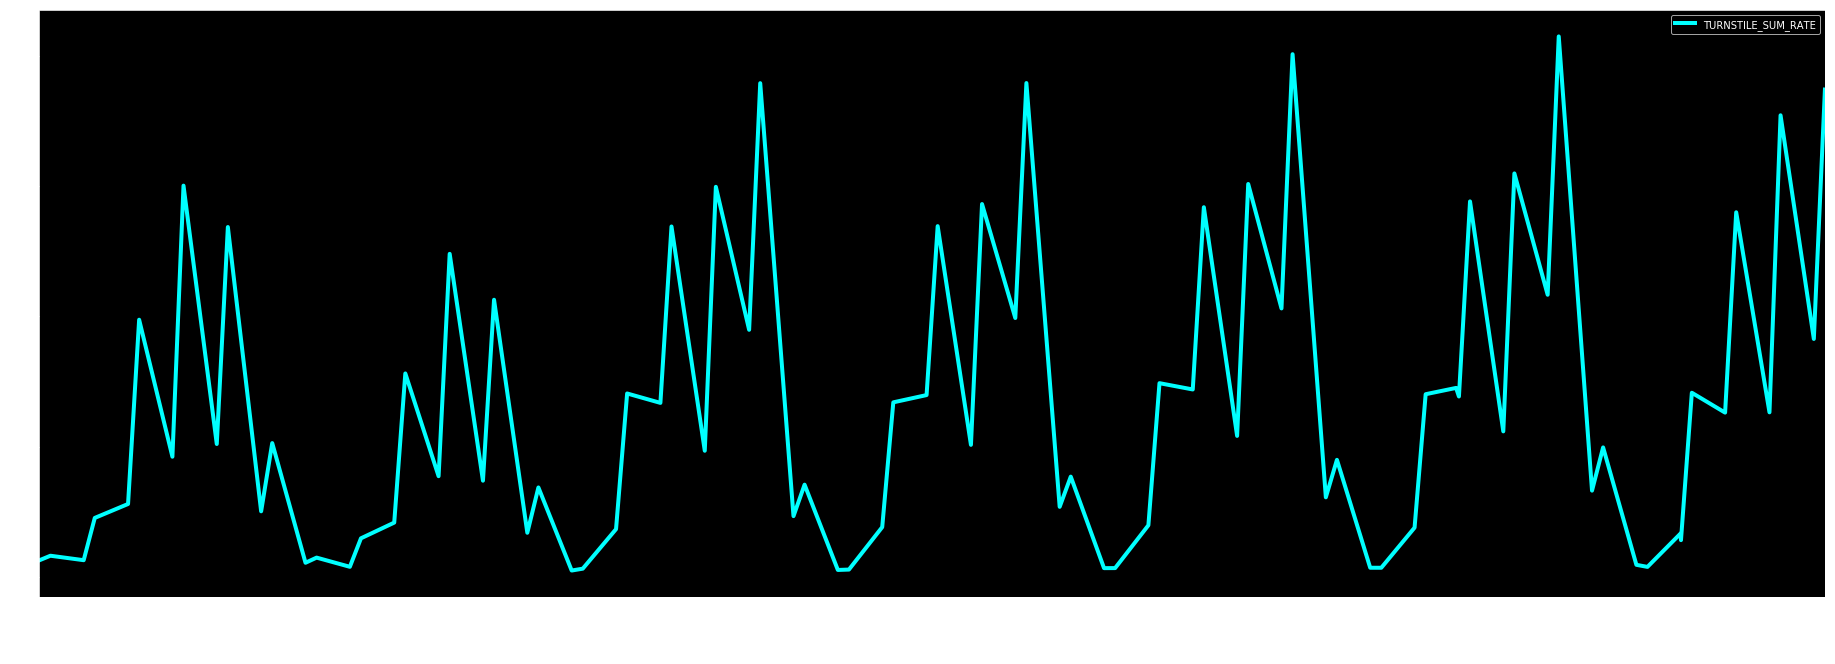

In [10]:
mask1 = (df["STATION"] == "CANAL ST")
#mask1 = (df["STATION"] == "42 ST-BRYANT PK")
#df.groupby(by=["STATION", "C/A", "SCP", "LINENAME"])["TURNSTILE_ENTRIES"].cumsum().plot()
df3=df[mask1]
#df3.head()
df4=df3.groupby(df3['DATE_TIME']).sum().reset_index()
df4['Bigsum']=df4['TURNSTILE_SUM_RATE'].cumsum()
#df4['time_hour'] = df4['DATE_TIME'].apply(lambda x: x.hour)
#df4.head(20)
#df4.plot(x ='DATE_TIME', y='Bigsum',figsize=(32,7),cmap='cool',linewidth=4.0)
ax=df4.plot(x ='DATE_TIME', y='TURNSTILE_SUM_RATE',figsize=(32,12),cmap='cool',linewidth=4.0, )

fig = ax.get_figure()
fig.savefig('hourlyrate_canal.png', transparent=True,bbox_inches='tight')


